In [1]:
import sys
import os
# Ajouter le répertoire principal du projet au chemin de recherche des modules
sys.path.append(os.path.abspath('../'))


In [2]:
import matplotlib.pyplot as plt # type: ignore
from hackathon.helpers.dataset_helpers import load_data
print("Importation réussie !")

Importation réussie !


In [3]:
path = "../dataset"  # Remonte au dossier parent pour accéder au dataset
datadir = os.path.join(path, "african_plums")
print(f"Chemin du dataset : {datadir}")

Chemin du dataset : ../dataset\african_plums


In [4]:
if not os.path.exists(datadir):
    print(f"Chemin invalide : {datadir}")
else:
    print("[INFO] Dataset trouvé, chargement en cours...")
    print("[INFO] loading datasets...")
    data, labels = load_data(datadir)
    print("[INFO] loaded datasets...")

[INFO] Dataset trouvé, chargement en cours...
[INFO] loading datasets...
Traitement du dossier : ../dataset\african_plums\bruised
Chargement de l'image : bruised_plum_1.png
Chargement de l'image : bruised_plum_10.png
Chargement de l'image : bruised_plum_100.png
Chargement de l'image : bruised_plum_101.png
Chargement de l'image : bruised_plum_102.png
Chargement de l'image : bruised_plum_103.png
Chargement de l'image : bruised_plum_104.png
Chargement de l'image : bruised_plum_105.png
Chargement de l'image : bruised_plum_106.png
Chargement de l'image : bruised_plum_107.png
Chargement de l'image : bruised_plum_108.png
Chargement de l'image : bruised_plum_109.png
Chargement de l'image : bruised_plum_11.png
Chargement de l'image : bruised_plum_110.png
Chargement de l'image : bruised_plum_111.png
Chargement de l'image : bruised_plum_112.png
Chargement de l'image : bruised_plum_113.png
Chargement de l'image : bruised_plum_114.png
Chargement de l'image : bruised_plum_115.png
Chargement de l'ima

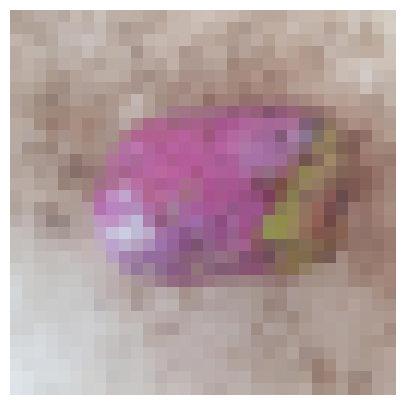

In [5]:
# Affiche la première image du dataset
img = data[1]  # Directement la matrice d'image déjà chargée

plt.figure(figsize=(10, 5))
plt.imshow(img)  # matplotlib attend un tableau d'image
plt.axis('off')
plt.show()

In [6]:
import cv2
import numpy as np


data = [cv2.resize(image, (32, 32)) for image in data]
data = np.array(data, dtype="float32")
data = np.expand_dims(data, axis=-1)
data /= 255.0


In [7]:
from sklearn.preprocessing import LabelBinarizer

# convert the labels from integers to vectors
le = LabelBinarizer()
labels = le.fit_transform(labels)
print(f"Shape of labels: {labels.shape}")
# counts = labels.sum(axis=0)



Shape of labels: (4507, 6)


In [8]:
# Préparer les données pour l'entraînement
from sklearn.model_selection import train_test_split


X, y = np.array(data), np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [9]:
# Paramètres
input_size = 32  # Exemple : images 32x32
num_classes = num_classes = labels.shape[1]
dropout_factor = 0.5  # Exemple : Dropout de 50%
print(f"Nombre de classes (num_classes): {num_classes}")



Nombre de classes (num_classes): 6


In [10]:
# Reshaper les données pour qu'elles aient une forme (28, 28, 1)
x_train = X_train.reshape(-1, 32, 32, 1)
x_test = X_test.reshape(-1, 32, 32, 1)

# check dimension of data
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (10815, 32, 32, 1)
y_train: (3605, 6)
x_test: (2706, 32, 32, 1)
y_test: (902, 6)


## Create your model

In [11]:
EPOCHS = 50

In [12]:
from hackathon.models.cnn import create_cnn_model

# Créer le modèle
model = create_cnn_model(input_size, num_classes, dropout_factor)

# Afficher le résumé du modèle
model.summary()


c:\Users\Ultra Tech\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 15, 15, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 6, 6, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 2, 2, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier_head (Dense)         │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,582 (174.15 KB)

 Trainable params: 44,582 (174.15 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compile the model: Define optimizer, loss function, and evaluation metrics
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
# Train the model using the data generator
# 'image' contains the input images, 'labels' contains corresponding labels
# Epochs determine how many times the entire dataset is passed forward and backward through the network
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.3655 - loss: 1.6785 - val_accuracy: 0.3969 - val_loss: 1.5544
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3687 - loss: 1.6034 - val_accuracy: 0.3969 - val_loss: 1.5543
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3849 - loss: 1.5784 - val_accuracy: 0.3969 - val_loss: 1.5483
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3900 - loss: 1.5803 - val_accuracy: 0.3969 - val_loss: 1.5540
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3694 - loss: 1.5943 - val_accuracy: 0.3969 - val_loss: 1.5519
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3730 - loss: 1.5936 - val_accuracy: 0.3969 - val_loss: 1.5468
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3838 - loss: 1.5821 - val_accuracy: 0.3969 - val_loss: 1.5438
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3775 - loss: 1.5912 - val_accu

In [16]:
# Print the training accuracy
accuracy = history.history['accuracy'][-1]
print(f"Training accuracy: {accuracy}")


Training accuracy: 0.5356449484825134
